<a href="https://colab.research.google.com/github/silveiraluiza/analise-covid-19/blob/master/Testes%20de%20Independ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Testes de Independência

Os testes de independência são utilizados para determinar se existe uma relação significativa entre duas variáveis categóricas. Existem dois tipos diferentes de testes de independência:
- o teste do qui-quadrado (o mais comum)
- o teste exacto do Fisher

Por um lado, o teste do qui-quadrado é utilizado quando a amostra é suficientemente grande (neste caso o valor p é uma aproximação que se torna exata quando a amostra se torna infinita, o que é o caso de muitos testes estatísticos). Por outro lado, o teste exato de Fisher é utilizado quando a amostra é pequena (e neste caso o valor p é exato e não é uma aproximação).

A literatura indica que a regra habitual para decidir se a aproximação χ2 é suficientemente boa é que o teste Qui-quadrado não é apropriado quando os valores esperados numa das células da tabela de contingência são inferiores a 5, e neste caso é preferível o teste exacto de Fisher (McCrum-Gardner 2008; Bower 2003).


### Hipóteses

As hipóteses do teste exato do Fisher são as mesmas que para o teste do qui-quadrado, ou seja:

- H0 : as variáveis são independentes, não há relação entre as duas variáveis categóricas. O conhecimento do valor de uma variável não ajuda a prever o valor da outra variável
- H1 : as variáveis são dependentes, existe uma relação entre as duas variáveis categóricas. O conhecimento do valor de uma variável ajuda a prever o valor da outra variável


## Exemplo:

De maneira geral, os doentes psiquiátricos podem ser classificados em psicóticos e neuróticos. Um psiquiatra realiza um estudo sobre os sintomas suicidas em duas amostras de 20 doentes de cada grupo. A nossa hipótese é que a proporção de psicóticos com sintomas suicidas é igual a proporção de neuróticos com estes sintomas (em um teste de independência, a hipótese nula seria, a presença ou ausência de sintomas suicidas é independente do tipo de doente envolvido)

> Fonte: http://www.portalaction.com.br/tabela-de-contingencia/51-aplicacao-do-teste-de-fisher

In [ ]:
linhas <- c("Presente", "Ausente")
colunas <- c("Psicótico", "Neurótico")

tabela <- matrix(c(2,6,18,14),ncol=2,byrow=TRUE)
colnames(tabela) <- colunas
rownames(tabela) <- linhas
tabela <- as.table(tabela)

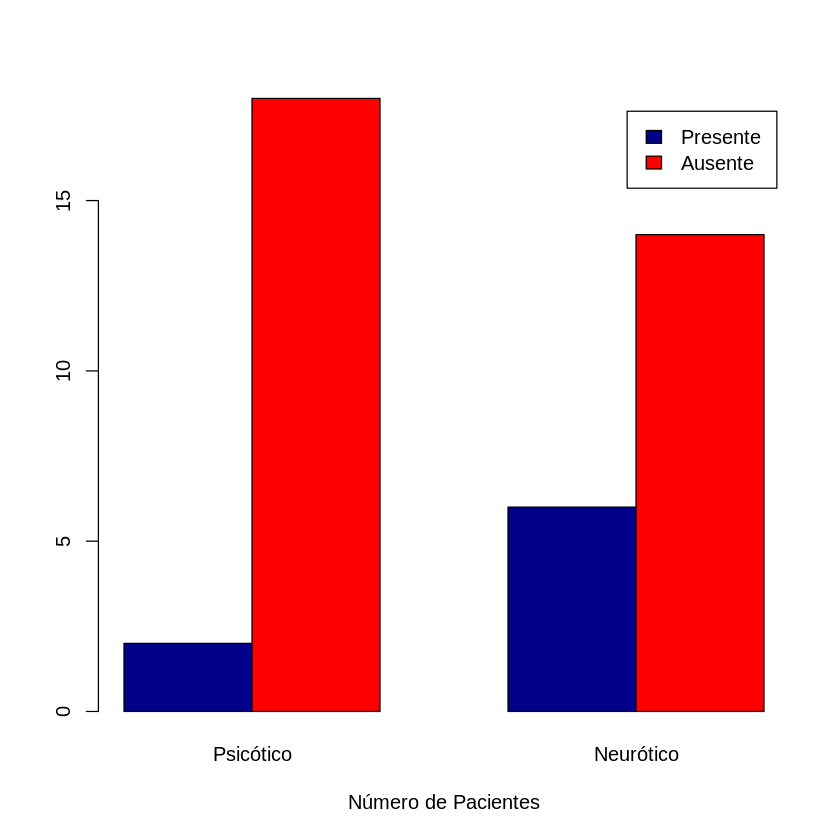

In [ ]:
counts <- tabela
barplot(counts,
  xlab="Número de Pacientes", col=c("darkblue","red"),
  legend = rownames(counts), beside=TRUE)

In [ ]:
test <- fisher.test(tabela)
test


	Fisher's Exact Test for Count Data

data:  tabela
p-value = 0.2351
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.02308176 1.80076397
sample estimates:
odds ratio 
 0.2680041 


In [ ]:
test$p.value

[1] 0.2351162

A partir das informações do teste e do valor do test$p.value vemos que o p-valor é superior ao nível de significância de 5%, portanto não podemos rejeitar a hipótese nula.

## Exemplo:
 Considere o processo de produção de uma fibra sintética, no qual o experimentador quer conhecer a influência da porcentagem de algodão na resistência da fibra. Para isto, foi realizado um experimento totalmente aleatorizado, no qual diversos níveis de porcentagem de algodão foram avaliados com respeito à resistência da fibra. Um ponto importante no planejamento do experimento é que para cada nível do fator (porcentagem de algodão), os outros fatores que influenciam o processo (como o meio ambiente, máquina, matéria prima, etc) devem apresentar um padrão homogêneo de variabilidade. No experimento, tomamos 5 níveis para a porcentagem de algodão e 5 replicações. 

> fonte: http://www.portalaction.com.br/anova/anova-um-fator#ex1





*   H0: Os dados seguem distribuição normal;
*   H1: Os dados não seguem distribuição normal.



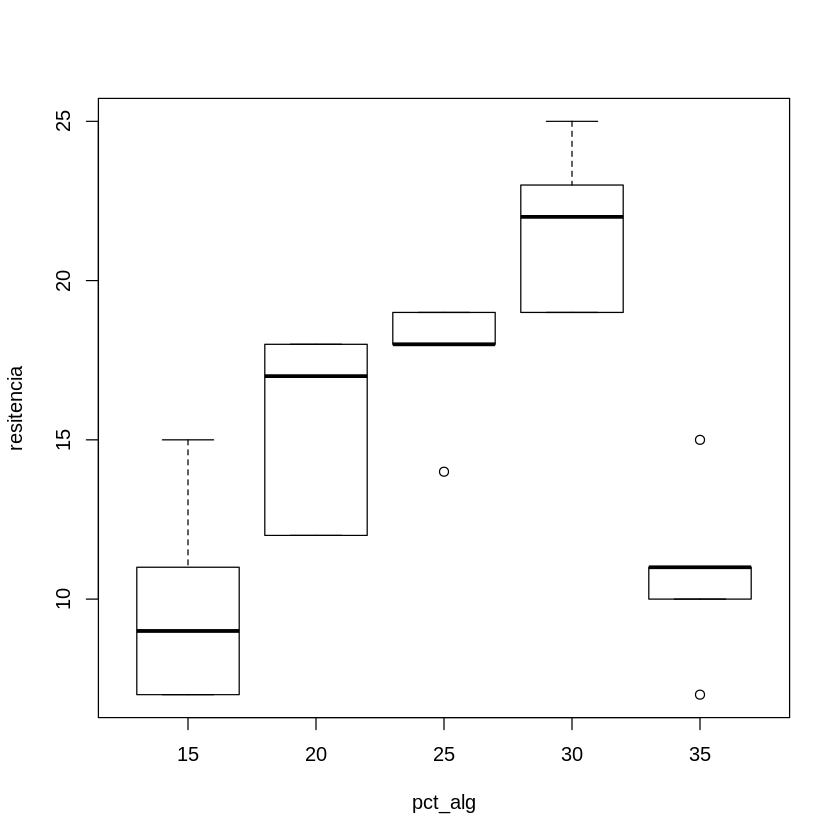

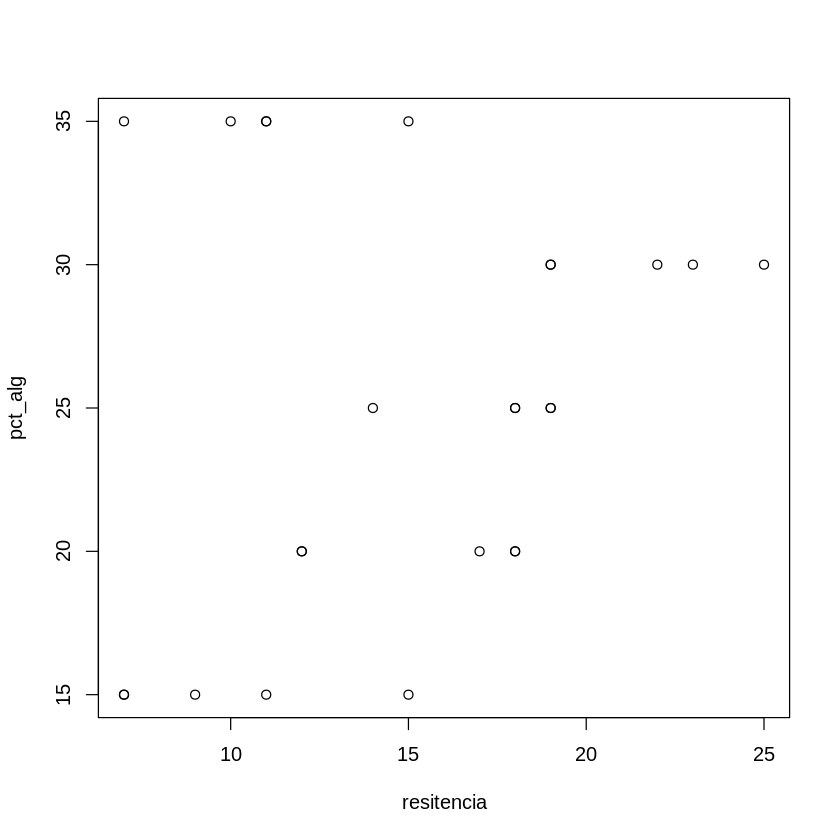

In [ ]:
## Dados

pct_alg <-c(15,15,15,15,15,
           20,20,20,20,20,
           25,25,25,25,25,
           30,30,30,30,30,
           35,35,35,35,35)

resitencia <-c(7,7,15,11,9,
           12,17,12,18,18,
           14,18,18,19,19,
           19,25,22,19,23,
           7,10,11,15,11)


boxplot(resitencia~pct_alg)
plot(resitencia,pct_alg)

## Ao considerarmos um nível de significância de $ 5\% $, não rejeitamos a hipótese de igualdade entre as médias dos níveis: $ (15,35); (20,25) $.


	Shapiro-Wilk normality test

data:  resitencia
W = 0.94971, p-value = 0.247


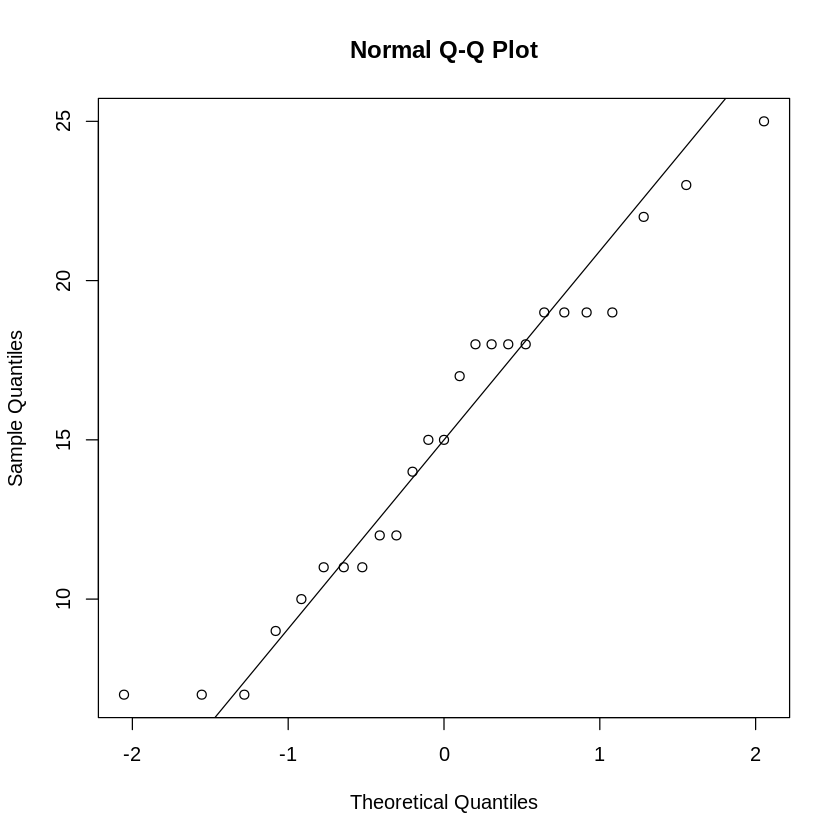

In [ ]:
shapiro.test(resitencia)
qqnorm(resitencia)
qqline(resitencia)

Comparando o W calculado com W alfa (0,927, pela tabela) temos que não é possível rejeitar H0 ao nível de significância α, pois Wcalculado > Wα (os valores críticos da estatística W de Shapiro-Wilk são dados na Tabela do link abaixo).

tabela: http://www.portalaction.com.br/inferencia/64-teste-de-shapiro-wilk